<a href="https://colab.research.google.com/github/shajidislamc/Diabetes-Detection-System/blob/main/Diabetes_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
data = pd.read_csv('/content/2025-07-04T13-24-57.561Z-diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

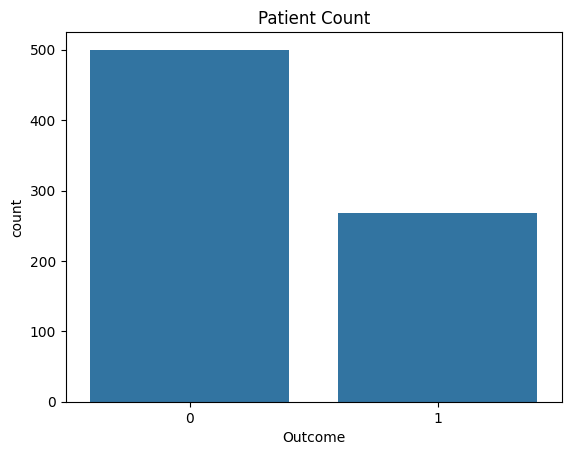

In [ ]:
sns.countplot(x='Outcome', data=data)
plt.title('Patient Count')
plt.show()

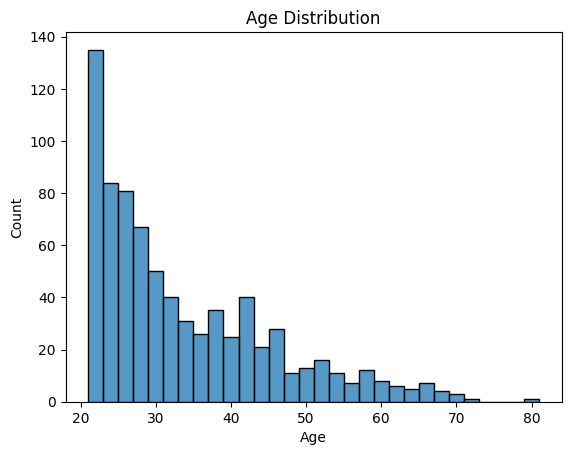

In [ ]:
sns.histplot(data['Age'],bins=30)
plt.title('Age Distribution')
plt.show()

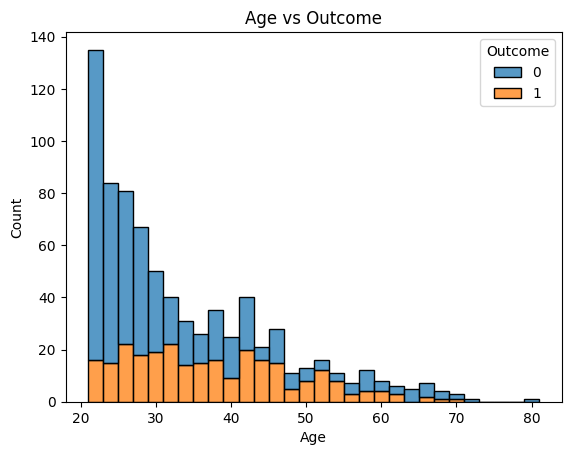

In [ ]:
sns.histplot(data = data , x='Age',hue='Outcome', multiple='stack', bins  = 30)
plt.title('Age vs Outcome')
plt.show()

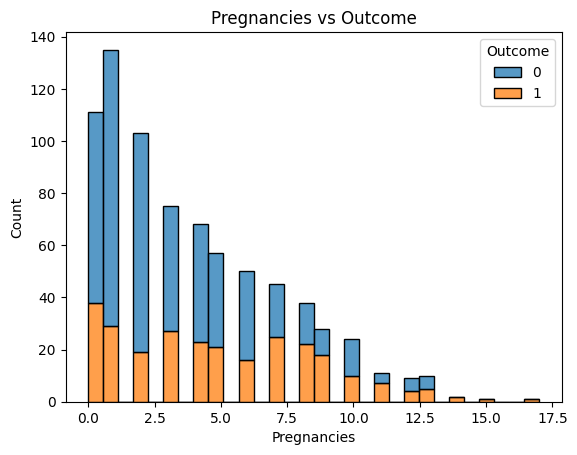

In [ ]:
sns.histplot(data=data, x='Pregnancies', hue='Outcome', multiple='stack', bins=30)
plt.title('Pregnancies vs Outcome')
plt.show()

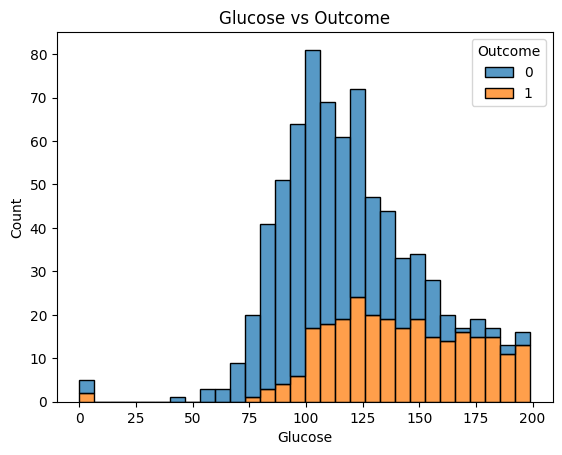

In [ ]:
sns.histplot(data=data, x='Glucose', hue='Outcome', multiple='stack', bins=30)
plt.title('Glucose vs Outcome')
plt.show()

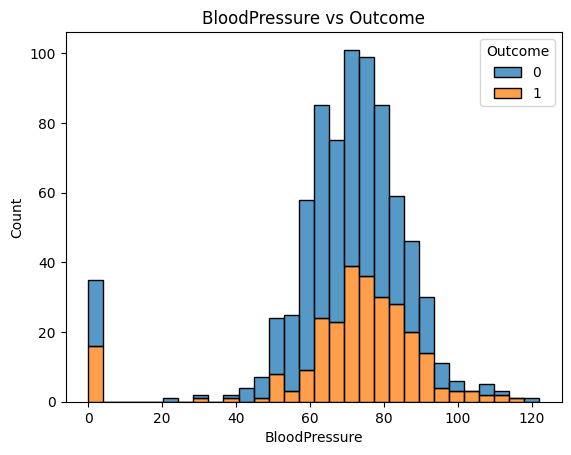

In [ ]:
sns.histplot(data=data, x='BloodPressure', hue='Outcome', multiple='stack', bins=30)
plt.title('BloodPressure vs Outcome')
plt.show()

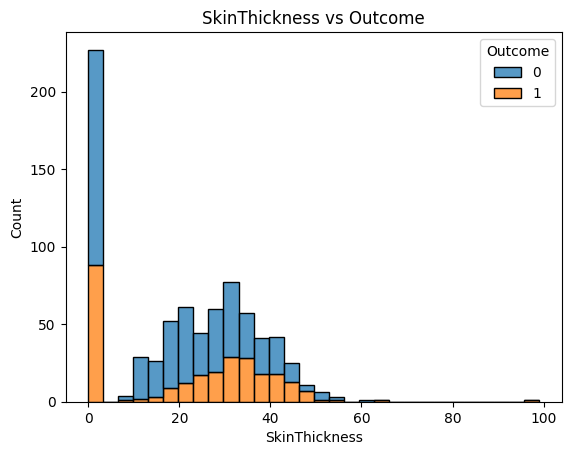

In [ ]:
sns.histplot(data=data, x='SkinThickness', hue='Outcome', multiple='stack', bins=30)
plt.title('SkinThickness vs Outcome')
plt.show()

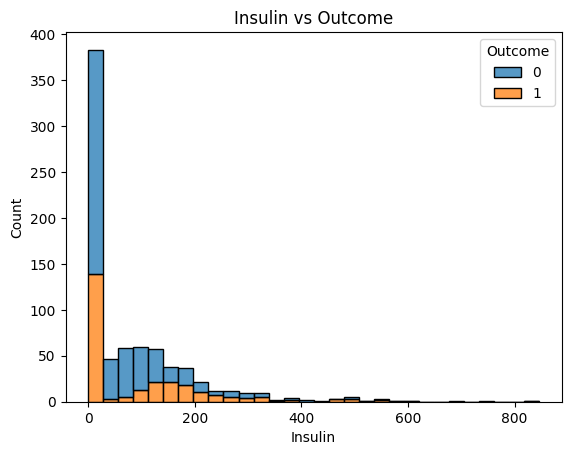

In [ ]:
sns.histplot(data=data, x='Insulin', hue='Outcome', multiple='stack', bins=30)
plt.title('Insulin vs Outcome')
plt.show()

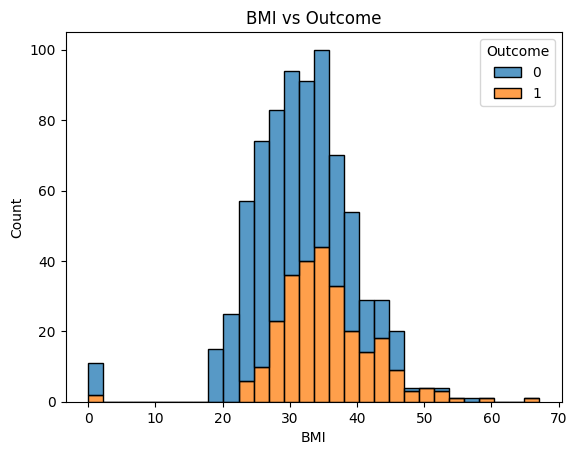

In [ ]:
sns.histplot(data=data, x='BMI', hue='Outcome', multiple='stack', bins=30)
plt.title('BMI vs Outcome')
plt.show()

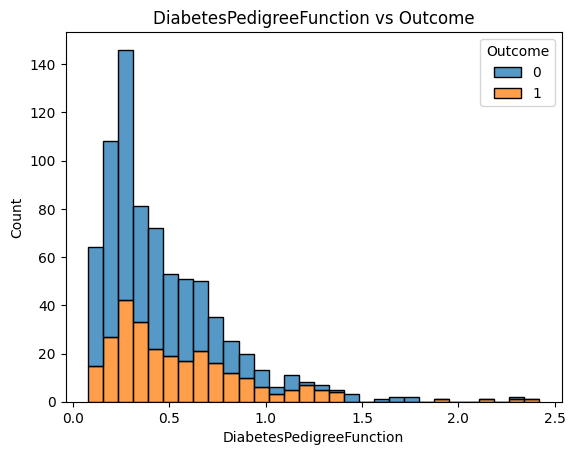

In [ ]:
sns.histplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome', multiple='stack', bins=30)
plt.title('DiabetesPedigreeFunction vs Outcome')
plt.show()

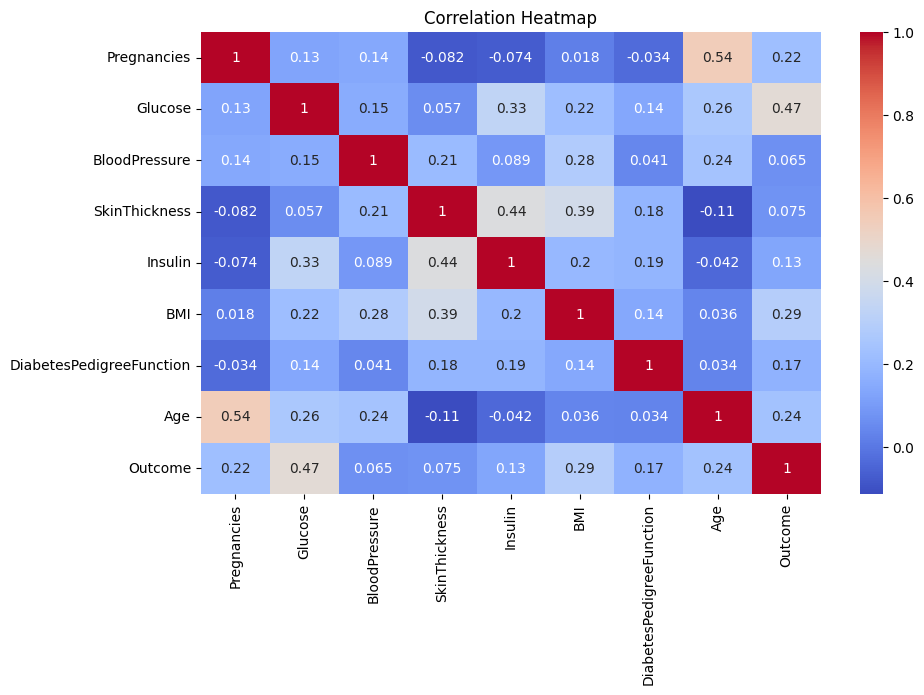

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr() , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

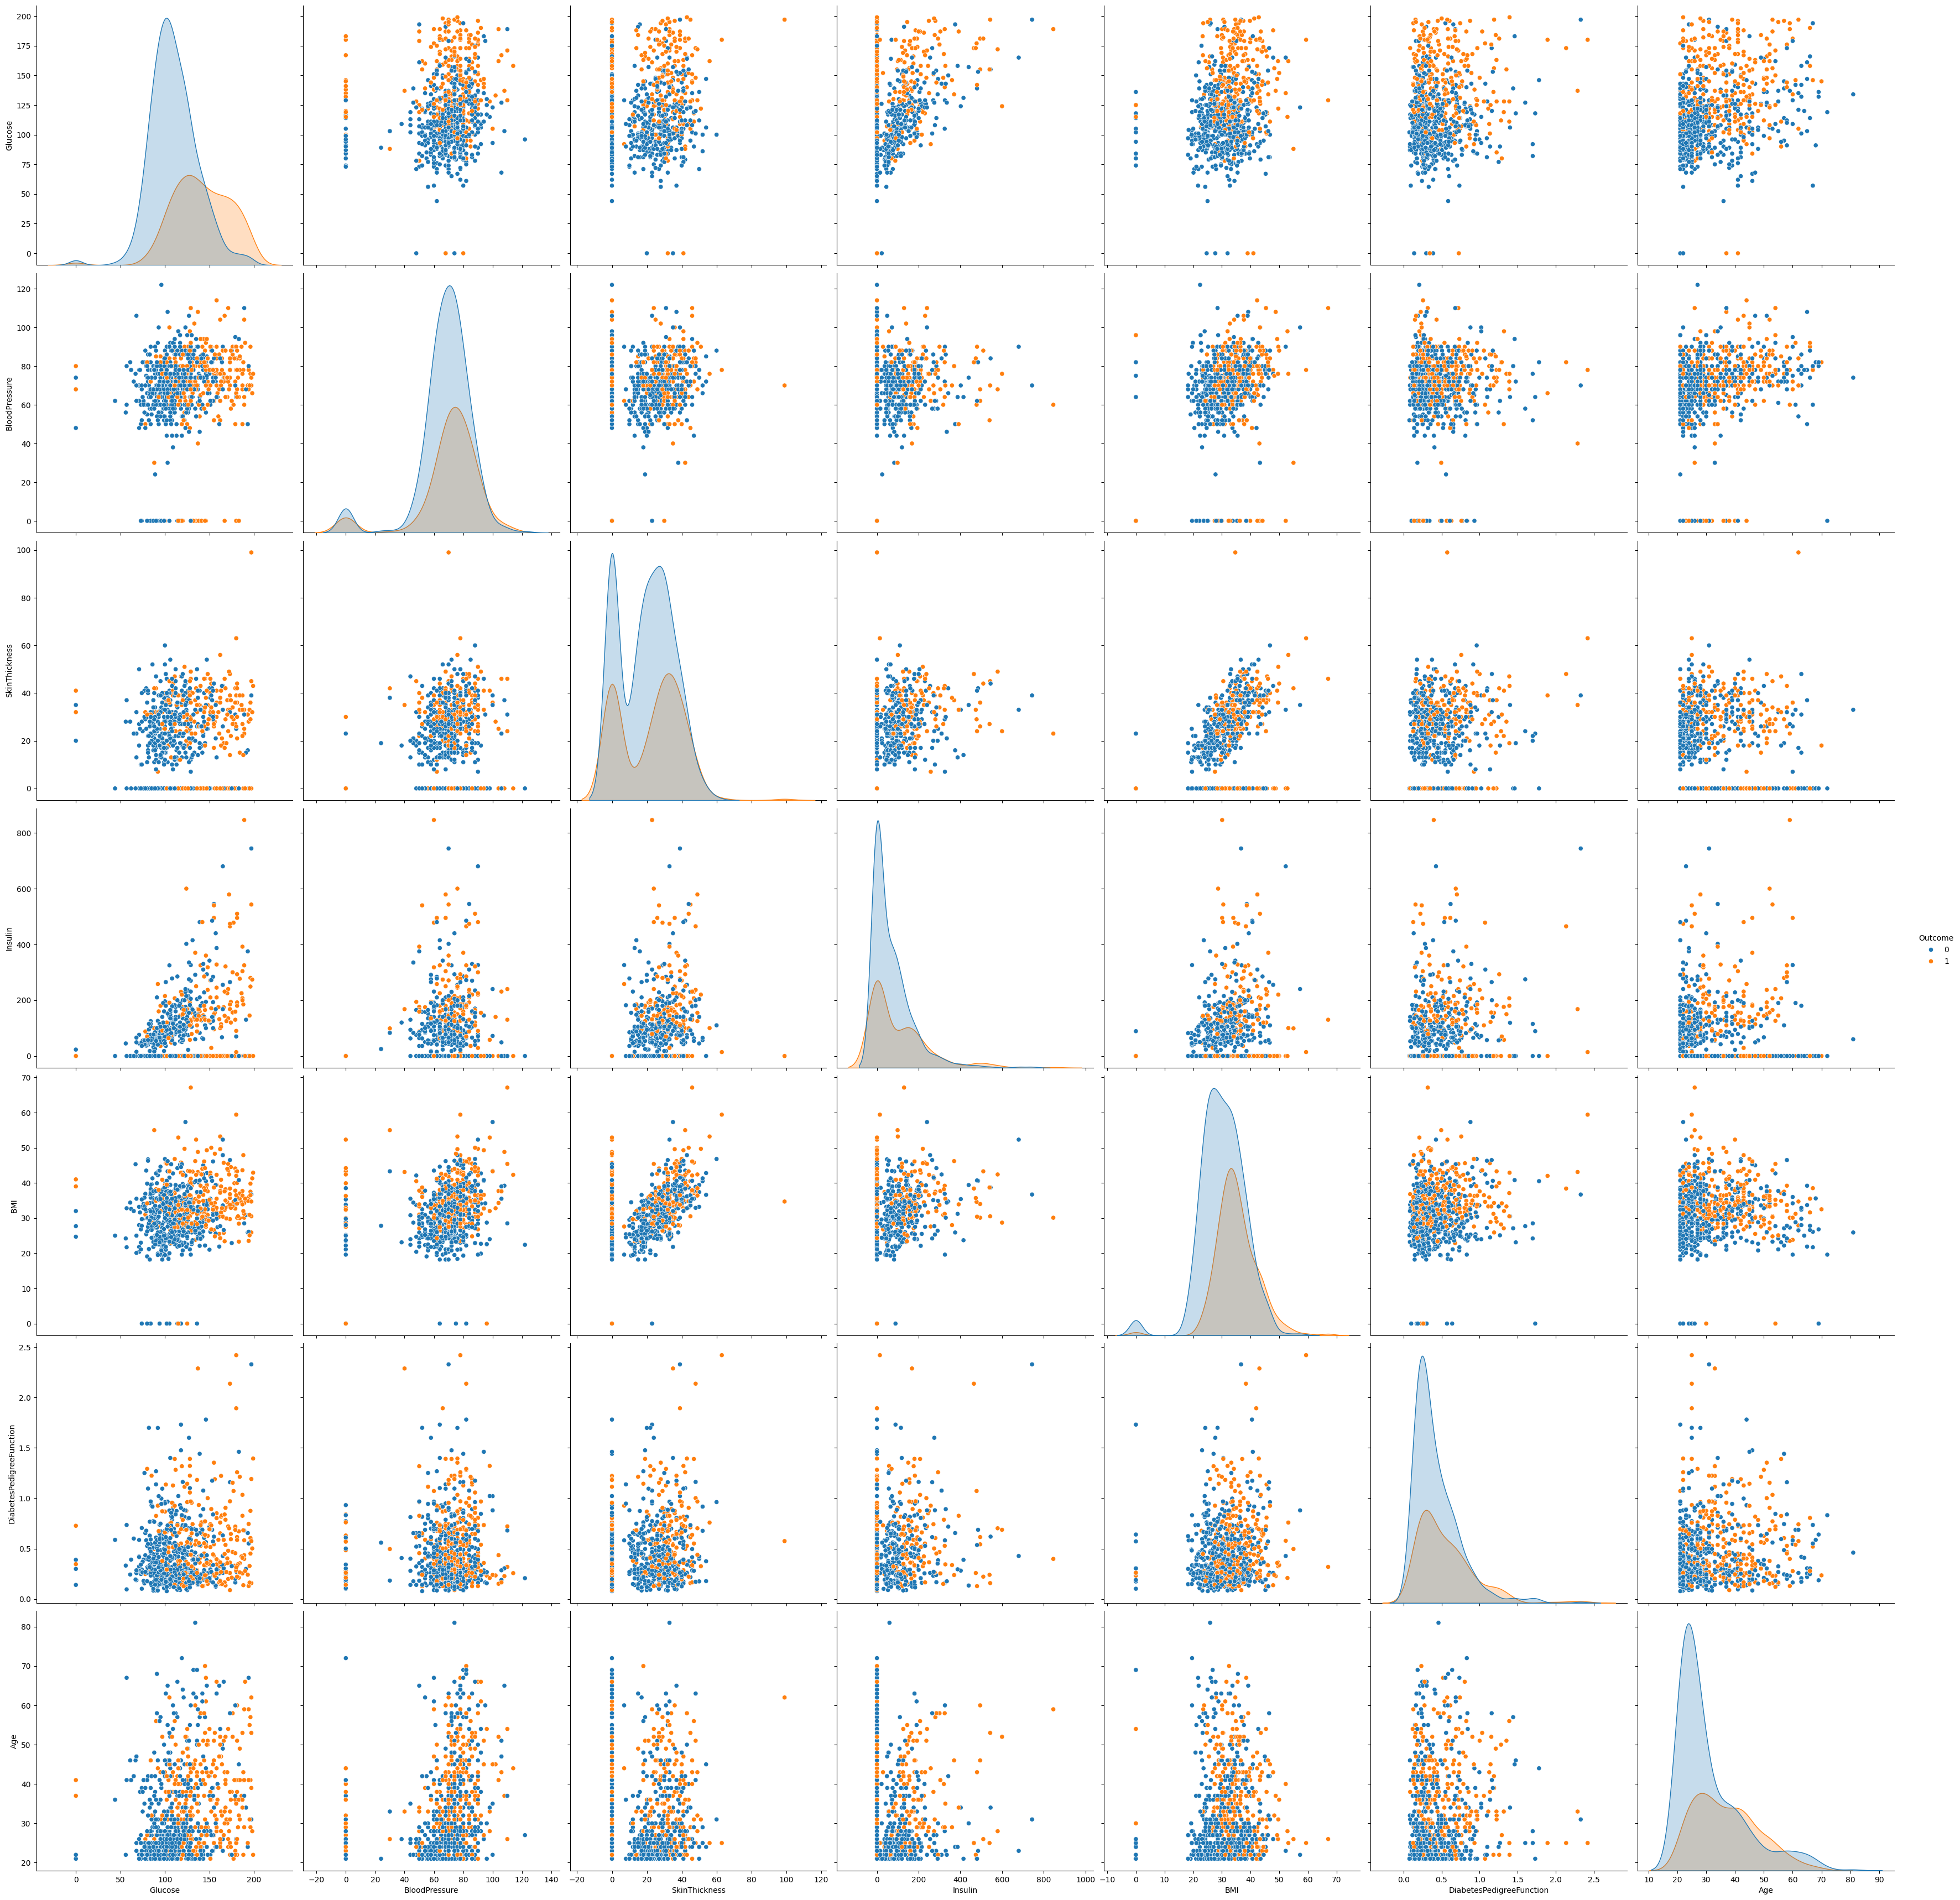

In [ ]:
sns.pairplot(data=data, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', height=5)
plt.show(block=True)

In [ ]:
X = data.drop(['Outcome'] , axis=1)
y = data['Outcome']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60     -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
618     1.588046 -0.276643       0.680345       0.233505 -0.701206 -0.489169   
346    -0.828460  0.566871      -1.265862      -0.090720  0.013448 -0.424522   
294    -1.130523  1.254179      -1.049617      -1.322774 -0.701206 -1.303720   
231     0.681856  0.410665       0.572222       1.076490  2.484601  1.838121   

     DiabetesPedigreeFunction       Age  
60                  -0.490735 -1.035940  
618                  2.415030  1.487101  
346                  0.549161 -0.948939  
294                 -0.639291  2.792122  
231                 -0.686829  1.139095


Scaled Test Data:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
668     0.491242 -0.726678      -0.441476       0.667308  1.051919  0.233748   
324    -0.633683 -0.285349       0.318908       0.611305 -0.660221  0.435379   
624    -0.633683 -0.411443      -0.173105      -1.180790 -0.660221 -0.145794   
690     1.053704 -0.442966       0.542551      -1.180790 -0.660221 -0.881156   
473     0.772473  0.471215       0.989836      -1.180790 -0.660221 -0.252540   

     DiabetesPedigreeFunction       Age  
668                 -0.170941  0.666612  
324                 -1.086080 -1.073358  
624                 -1.053629 -1.073358  
690                  1.211504 -0.045194  
473                 -0.884879  1.220238

In [ ]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nüîç Confusion Matrix for {name}:")
    print(cm)
    print("Accuracy:", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    results[name] = (model, y_pred)


üîç Confusion Matrix for Logistic Regression:
[[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


üîç Confusion Matrix for KNN:
[[70 29]
 [23 32]]
Accuracy: 0.6623376623376623
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154


üîç Confusion Matrix for Decision Tree:
[[75 24]
 [14 41]]
Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.84  

/tmp/ipython-input-136-1963483874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


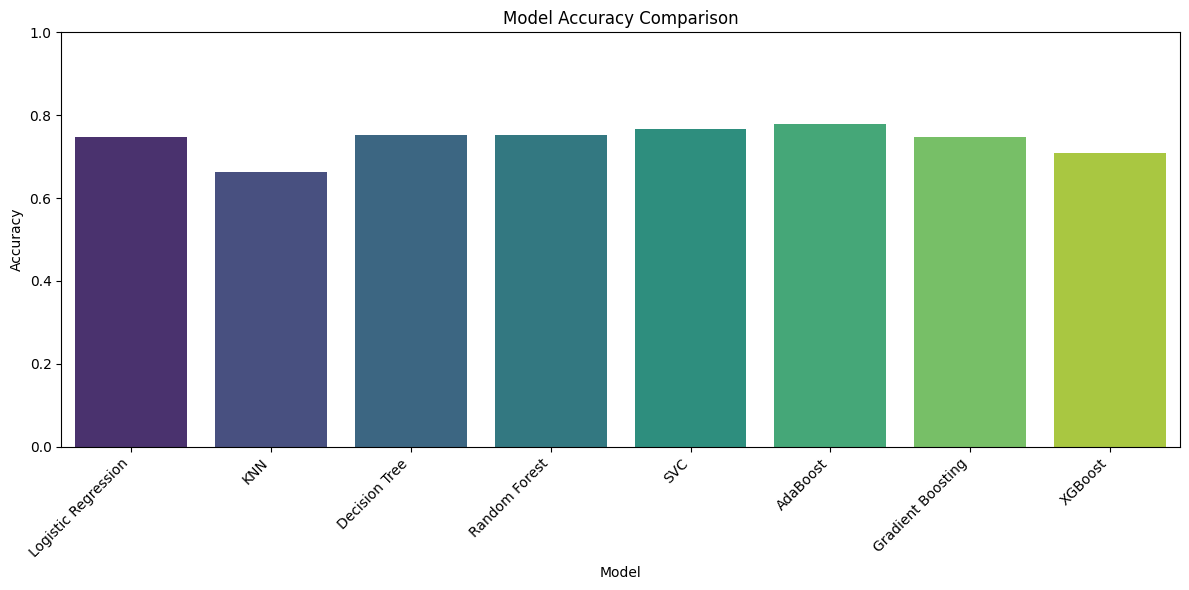

In [ ]:
model_names = list(results.keys())
accuracy_scores = [accuracy_score(y_test, results[name][1]) for name in model_names]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

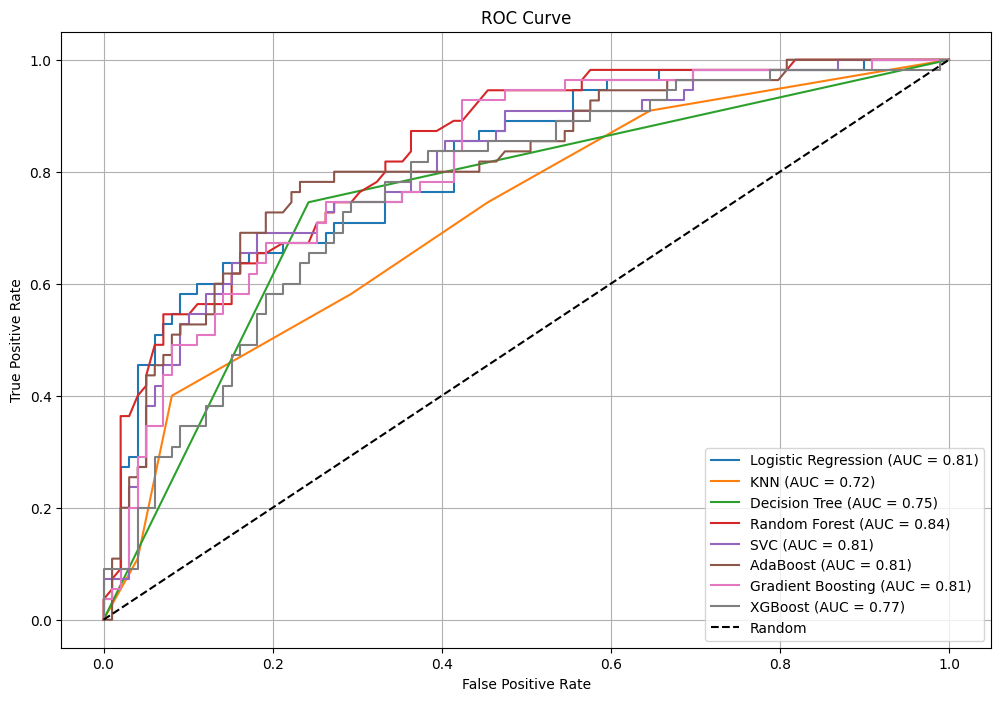

In [ ]:
plt.figure(figsize=(12, 8))

for name, (model, y_pred) in results.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()